# Preprocessing Normalization Mode Experiments (Keras Pre-train Model)

- caffe: RGB to BGR, then will zero-center each color channel with respect to the ImageNet dataset, without scaling.
- tf: Scale pixels between -1 and 1, sample-wise.
- torch: Scale pixels between 0 and 1 and then will normalize each channel with respect to the ImageNet dataset.

[keras/applications](https://github.com/tensorflow/tensorflow/tree/v2.4.1/tensorflow/python/keras/applications)

[keras/applications/imagenet_utils](https://github.com/tensorflow/tensorflow/blob/85c8b2a817f95a3e979ecd1ed95bff1dc1335cff/tensorflow/python/keras/applications/imagenet_utils.py#L104)

## Conclusion
tf & torch (both):

**InceptionResNetV2**, **MobileNetV1**, **MobileNetV2**, **NASNet**, **DenseNet**

---
<br>
tf: 

**InceptionV3**, **ResNetV2**, **Xception**

---
<br>
original(0~255) & caffe (both):

**EfficientNet**, **MobileNetV3**, **ResNetV1**, **VGG**

## Upload Image

In [27]:
from google.colab import files
uploaded = files.upload()

Saving panda.jpg to panda.jpg


## Inference

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[('n04404412', 'television', 0.9713245), ('n03950228', 'pitcher', 0.028674303), ('n01924916', 'flatworm', 9.4852425e-07), ('n06359193', 'web_site', 2.2712707e-07), ('n04152593', 'screen', 3.2489276e-09)]]
[[('n01924916', 'flatworm', 0.99859256), ('n03047690', 'clog', 0.0012502557), ('n01665541', 'leatherback_turtle', 7.172084e-05), ('n04154565', 'screwdriver', 5.689103e-05), ('n04366367', 'suspension_bridge', 1.65824e-05)]]
[[('n02510455', 'giant_panda', 0.6085066), ('n04254680', 'soccer_ball', 0.28319272), ('n02100735', 'English_setter', 0.008786038), ('n02058221', 'albatross', 0.006348668), ('n02120079', 'Arctic_fox', 0.0060193487)]]
[[('n02510455', 'giant_panda', 0.9607927), ('n02509815', 'lesser_panda', 0.0019195953), ('n04254680', 'soccer_ball', 0.00052945846), ('n04266014', 'space_shuttle', 0.00049605523), ('n02132136', 'brown_bear', 0.0003683855)]]


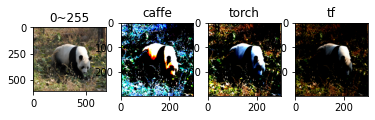

In [122]:
from skimage.io import imread
from skimage.transform import resize
from skimage import img_as_ubyte

import tensorflow as tf
from tensorflow.python.keras.applications import imagenet_utils
from tensorflow.keras.applications.imagenet_utils import decode_predictions

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Input image read
image = imread('./panda.jpg')

# Pre-train model
model = tf.keras.applications.InceptionV3()

# Normalization
image_size = model.input_shape[1]
x = img_as_ubyte(resize(image, (image_size,image_size),anti_aliasing=False))
caffe = imagenet_utils.preprocess_input(x, data_format=None, mode='caffe')
torch = imagenet_utils.preprocess_input(x, data_format=None, mode='torch')
tf = imagenet_utils.preprocess_input(x, data_format=None, mode='tf')

# Visualization
plt.subplot(1,4,1)
plt.title('0~255')
plt.imshow(image)
plt.subplot(1,4,2)
plt.title("caffe")
plt.imshow(caffe)
plt.subplot(1,4,3)
plt.title("torch")
plt.imshow(torch)
plt.subplot(1,4,4)
plt.title("tf")
plt.imshow(tf)

# Inference
for i in [x,caffe,torch,tf]:
  i = np.expand_dims(i, 0)
  y = model.predict(i)
  print(decode_predictions(y))